# 클래스 별 routine flg

In [46]:
import pandas as pd
customer_join = pd.read_csv('data/스포츠센터데이터/customer_join.csv')
customer_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        4192 non-null   object 
 1   name               4192 non-null   object 
 2   class              4192 non-null   object 
 3   gender             4192 non-null   object 
 4   start_date         4192 non-null   object 
 5   end_date           1350 non-null   object 
 6   campaign_id        4192 non-null   object 
 7   is_deleted         4192 non-null   int64  
 8   class_name         4192 non-null   object 
 9   price              4192 non-null   int64  
 10  campaign_name      4192 non-null   object 
 11  mean               4192 non-null   float64
 12  median             4192 non-null   float64
 13  max                4192 non-null   int64  
 14  min                4192 non-null   int64  
 15  routine_flg        4192 non-null   int64  
 16  calc_date          4192 

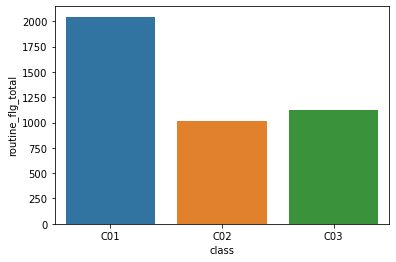

In [47]:
# 클래스별 routine_flg_total
group_class_total = customer_join.groupby('class_name', as_index = False).agg(routine_flg_total = ('routine_flg', 'count'))

# 클래스별 routine_flg == 1
routine_flg_1 = customer_join[customer_join.copy().loc[:,'routine_flg'] == 1]
group_class_routine1 = routine_flg_1.groupby('class_name', as_index = False).agg(routine_flg_routine1 = ('routine_flg', 'count'))

# 클래스별 routine_flg == 0
routine_flg_0 = customer_join[customer_join.copy().loc[:,'routine_flg'] == 0]
group_class_routine0 = routine_flg_0.groupby('class_name', as_index = False).agg(routine_flg_routine0 = ('routine_flg', 'count'))

# 최종 클래스별 routine_flg
group_class_RF = group_class_total.merge(group_class_routine1, on = 'class_name')
group_class_RF = group_class_RF.merge(group_class_routine0, on = 'class_name')

# 시각화
import seaborn as sns
graph_routine1 = sns.barplot(data = group_class_RF, x = 'class_name', y = 'routine_flg_routine1')

graph_routine0 = sns.barplot(data = group_class_RF, x = 'class_name', y = 'routine_flg_routine0')

graph_routine_total = sns.barplot(data = group_class_RF, x = 'class_name', y = 'routine_flg_total')

  class  routine_flg_routine1
0   C01                  1675
1   C02                   812
2   C03                   926
  class  routine_flg_routine0
0   C01                   370
1   C02                   207
2   C03                   202


,class,routine_flg_total,routine_flg_routine1,routine_flg_routine0
0,C01,2045,1675,370
1,C02,1019,812,207
2,C03,1128,926,202


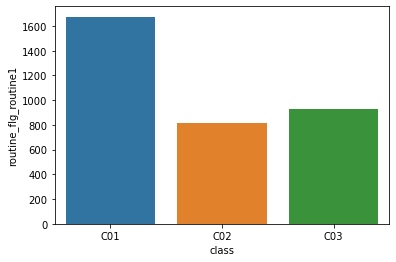

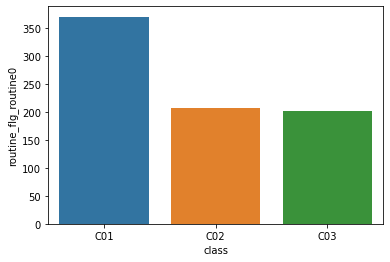

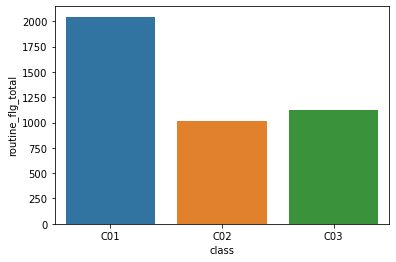